## Introduction
#### Making informative visualizations is one of the most important tasks of Data Analysis.
#### It can be a part of an exploratory process eg - identify outliers or data tarnsformations needed, or as a way of generating ideas for models.
#### In other cases, building a model may be the end goal.
#### Python has many add-on libraries for making static or interactive visualizations.

#### matplotlib -
#### It is a desktop plotting package for publication-quality plots. It supports various GUI backends of different OS.
#### It can export visualizations of all common vector and raster formats. eg - PDF, SVG, JPG, PNG, etc.
#### Over time, it has spawned number of add-on toolkits that use matplotlib for their underlying plotting.

## A brief matplotlib API Primer
#### matplotlib has a specific import convention. It also has a specific stement to make the plots interactive in the notebook.

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import numpy as np

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

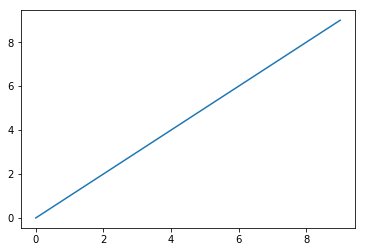

In [3]:
plt.plot(data)

### Figures and Subplots
#### Plots in matplotlib reside in 'Figure' object. We can create a new figure with 'plt.figure'.
#### When we create this object, nothing will be shown in the notebook, until we use other commands.
#### 'plt.figure' has a number of options, eg - 'figsize' will guarantee that the figure has a certain size and aspect ratio.

#### You cannot make a plot on an empty figure. You need to create one or more subplots using 'add_subplot'.
#### The first 2 arguments dictate the number or rows and columns in the subplots. The third argument chooses the specific subplot from this matrix. 
#### eg - Arguments (2,2,1) tells that we have 4 subplots and we are currently using the first one.
#### We can later select other subplots of this matrix by changing the third argument.
#### On actually adding a plotting command, matplotlib draws on the last figure and subplot used, creating one if necessary, hiding the figure and subplot creation.
#### We can use different 'style options' to plot different kinds of lines on our plot.
#### The 'fig.add_subplot' returns AxesSubplot objects, on which you can directly plot by callin their instance method.

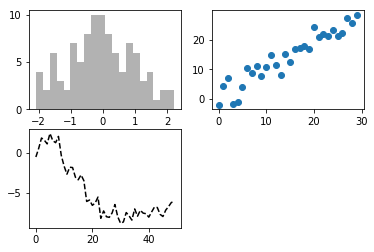

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

#### Adding a grid of subplots is a common task, so matplotlib has a convinience method 'plt.subplots' which creates new figure and return NumPy array having the subplot objects.
#### This is very useful as it allows to index plots like a 2-d array.
#### You can use 'sharex' and 'sharey' to indicate that subplots should have same x or y axis respectively.
#### This helps when we are comparing data on same scale. Otherwise, matplotlib autoscales plot limits independently.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220F2E50940>,
      dtype=object)

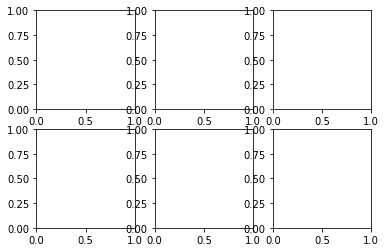

In [5]:
fig, axes = plt.subplots(2,3)
axes

### Adjusting the Spacing Around Subplots
#### Matplotlib by default will leave certain amount of padding around the plot and between subplots.
#### This spacing is relative to the size of the plot. So if you resize the plot, the plot will dynamically adjust itself.
#### We can change this spacing using the 'subplots_adjust' method. Parameters 'wspace' and 'hspace' controls percent of the figure width and height respectively to use as spacing between subplots.
#### We can shrink it all the way down to 0.
#### If we do so, then the axis labels will overlap and matplotlib doesn't check it. In such a case you have to manually fix the labels and explicitly specify the tick locations and labels.

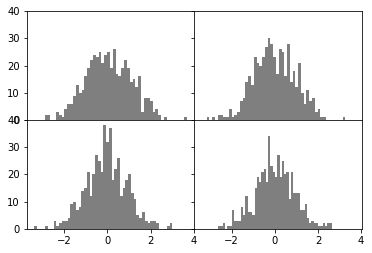

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles
#### Matplotlib's main 'plot' function accepts array of x and y coordinates and optionally an abbreviated string indicating color and line style.
#### Eg - To plot x an y with green dashes we can use 'g--' as the abbreviation.
#### The above example is a convinience if we want to describe color and style in the same string.

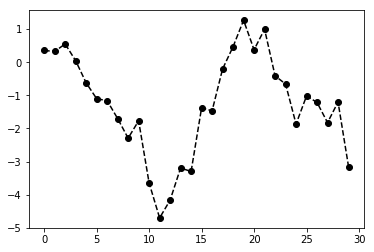

In [7]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

#### But if you are creating plots programmatically, you may have to express  these explicitly with 'linestyle' and 'color' parameters.
#### Eg - linestyle = '--', color='g' for the same style as previously provided.
#### There are a number of color abbreviations for commonly used colors. You can specify any color using its Hex code eg - '#CECECE'.
#### Line plots can also have markers to highlight actual data points. But since matplotlib creates continuous line, joining the points, it can be unclear where the points lie.
#### The 'marker' can a part of the style string, like a color followed by marker type and line style.
#### When we run the plot command, matplotlib will return an object that references plot subcomponent that was just added. You can safely ignore this output.

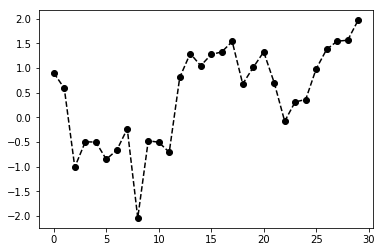

In [8]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

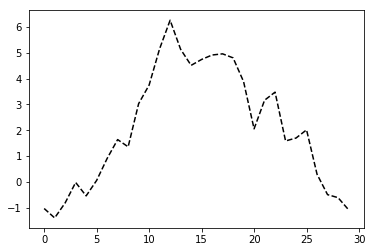

In [9]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')

#### Line plots are points interpolated linearly by default. This can be altered with 'drawstyle' option.
#### We can also pass label arguments to the plot, which will help us create a plot legend to identify each line using 'plt.legend'.
#### NOTE - You must call plt.legend or ax.legend to create the legend, whether or not you passed the label options.

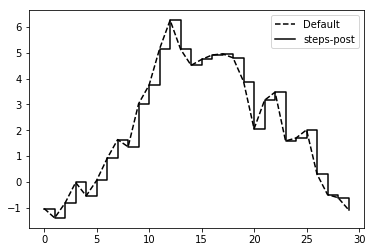

In [10]:
plt.plot(data, 'k--', label='Default')
plt.plot(data,'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels and Legends
#### For most plot decorations there are two ways to do things - 1. procedural pyplot interface and 2. Object-oriented native matplotlib API.
#### pyplot is designed for interactive use and consists of methods like 'xlim', 'xticks' and 'xticklabels'. They control plot range, tick locations and tick labels respectively.
#### They can be used in two ways :
####     1. Called with no arguments and they return the current parameter value. eg - plt.xlim() returns current x-axis plotting range.
####     2. Called with parameters sets the parameter value. eg - plt.xlim([0, 10]) sets x-axis range to 0 to 10.
####    
#### These methods act on the active or most recently created AxesSubplot.
#### Each corresponds to two methods on the subplot object itself. eg - for 'xlim' these are 'ax.get_xlim' and 'ax.set_xlim'.
#### In the interest of being explicit and working with multiple subplots, using the subplot instance methods is the best bet.

### Setting the Title, Axis Labels, Ticks, and Ticklabels
#### To change x-axis ticks in plot, it is easiest to use 'set_xticks' and 'set_xticklabels'.
#### The former instructs where to place the ticks along the data range. 
#### By default, these locations will also be labels but can be set to any other value using 'set_xticklabels'.
#### The 'rotation' option stes the tick labels at declared degrees of rotation.
#### 'set_xlabel' gives a name to the x-axis and 'set_title' the subplot title.

Text(0.5,0,'Stages')

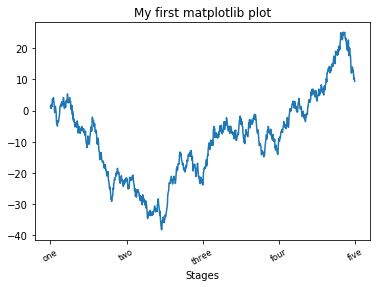

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Modifying the y-axis consists of the same process.
#### The axes class has a 'set' method that allows batch setting of plot properties.
#### The above example could have also been implemented using batch.

In [12]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5,17.2,'Stages'), Text(0.5,1,'My first matplotlib plot')]

### Adding Legends
#### There are a couple of ways to add a legend to a plot. The easiest is to pass the 'label' argument when adding each piece of the plot.
#### Once added, we can call this using either 'ax.legend()' or 'plt.legend()' to create it.
#### The legend method has several choices for the 'loc' argument. It tells matplotlib where to place the plot.
#### If you are not picky, 'best' is a good option, as it will choose a location most out of the way.
#### To exclude one or more elements from legend, pass no label or " label='_nolegend_' ".

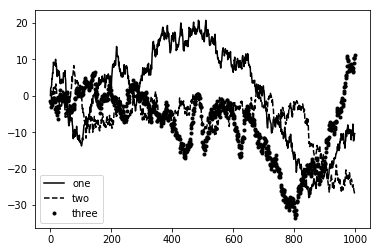

In [13]:
from numpy.random import randn

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### Annotations and Drawing on a Subplot
#### In addition to the standard plot types, you may want to add your own annotations like text, arrows, etc.
#### You can add these using the 'text', 'arrow', and 'annotate' functions. eg - 'text' draws text at given coordinates '(x,y)' on the plot.
#### Annotations can draw both text and arrows arranged appropriately in the plot.
#### 'ax.annotate' can draw labels at indicated x and y coordinates.
#### We can use 'set_xlim' and 'set_ylim' to manually set statrt and end boundaries for the plot.
#### 'ax.set_title' adds the main title to the plot.

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

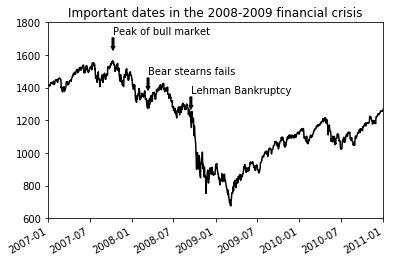

In [14]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear stearns fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext = (date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,
                              headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007 - 2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

#### Drawing shapes requires mor care. matplotlib has 'objects' that represents common shapes, referred as patches.
#### Common shapes like 'Rectangle' and 'Circle' are found in 'matplotlib.pyplot' but full set is in 'matplotlib.patches'.
#### To add a shape to a plot, create the patch objct and add it to the subplot by calling 'ax.add_patch()'.

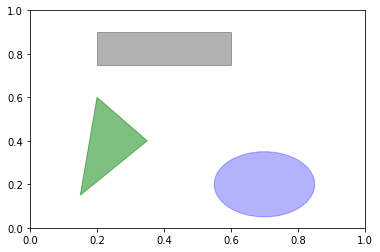

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File
#### You can save the active figure using 'plt.savefig'. The file type can be inferred from file extension.
#### There are couple of important options that we need to use frequently:
####     1. dpi - It controls the 'dots per inch' resolution.
####     2. bbox_inches - Trims whitespace around actual figure. There a string options that you use to get the right width.
#### 'savefig' does not have to write to disk. It can also write to any file-like object. eg - BytesIO.

In [16]:
# To just save the plot to a file. 
# plt.savefig('figpath.svg')

# To save the same plot as a PNG with minimal whitespace around the plot and 400 DPI.
# plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [17]:
# To save using BytesIO

# from io import BytesIO
# buffer = ByteIO()
# plt.savefig(buffer)
# plot_data = buffer.getvalue()

### matplotlib Configuration
#### matplotlib comes configured with color schemes and defaults, geared primarily for preparing figures for publication.
#### But this default behavior can be customized via an extensive set of global parameters like figure size, subplot spacing, colors, font sizes, etc.
#### One way to programmatically configure this configuration is to use 'rc' method. eg - Set default figure size to 10 * 10.
#### The first argument of rc is the component you want to change. eg - 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend', etc.
### After that we can pass a sequence of keyword arguments indicating the new parameters.
#### An easy way to write down options is to use a dict.

In [18]:
# To change size of plots
# plt.rc('figure', figsize=(10, 10))

In [19]:
# To change multiple options using dict

# font_options = {'family': 'monospace',
#                'weight': 'bold',
#                'size': 'small'}
# plt.rc('font', **font_options)

#### For extensive customization and to see complete list of options, matplotlib comes with a configuration file 'matplotlibrc' in the 'matplotlib/mpl-data' directory.
#### If you customize this file and place it in your home directory titled '.matplotlibrc', it will be loaded each time you use matplotlib.
#### Many other packages, like 'seaborn' have built-in themes or styles derived from matplotlib's configuration system internally.

## Plotting with pandas and seaborn
#### matplotlib can be a low-level tool. You assemble a plot from base components - data display (type of plot like bar, line, box, scatter, etc.), legend, title, tick labels and other annotations.
#### In pandas we have multiple columns of data along with row and column labels. pandas itself has some built-in methods that simplify creating visualizations.
#### Another library is 'seaborn', which is a statistical graphics library which simplifies many common visualisation types.
#### NOTE - Importing seaborn modifies default matplotlib color schemes and plot styles for improved readability adn aesthetics. Even if we do not use the seaborn API, it is advisable to still import it to improve visual aesthetics of general matplotlib plots.

### Line Plots
#### Both Series and DataFrame have a 'plot' attribute for making basic plot types. By default 'plot()' makes line plots.
#### Series object's index is passed for plotting on the x-axis. We can disable this by passing 'use_index=False'.
#### The x-axis ticks and limits can be adjusted with 'xticks' and 'xlim' options. same with y-axis and 'yticks' and 'ylim'.
#### Most of pandas' plot methods accept an optional 'ax' parameter, which can be a subplot object. It gives flexibility in subplot placement in the grid.

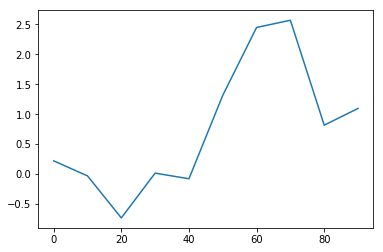

In [22]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

#### DataFrame's 'plot' method plots each of its columns as a different line on the same subplot, automatically creating a legend.
#### The 'plot' attribute contains a "family" of methods for different plot types. eg - 'df.plot()' is equivalent to 'df.plot.line()'.
#### DataFrame has a number of options giving us some flexibility with how columns are handled.
#### NOTE - Additional keyword arguments to 'plot' are passed through the respective matplotlib plotting function so that we can further customize these plots.

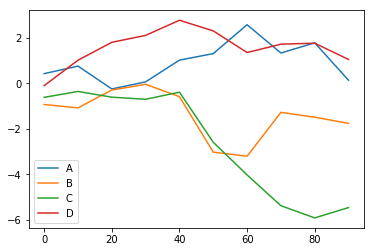

In [24]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df.plot()

### Bar Plots
#### The 'plot.bar()' and 'plot.barh()' make vertical and horizontal bar plots respectively. The Series or DataFrame index will be used as 'x(bar)' or 'y(barh)' ticks.
#### The option "color='k'" is for setting the color to black and 'alpha=0.7' is to use partial transparency in the filling.

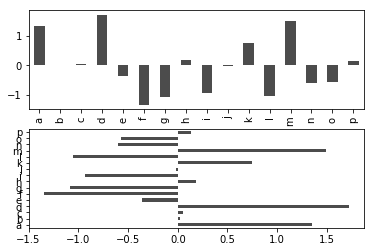

In [26]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

#### For DataFrame, bar plots group the values in each row together in a group in bars side-by-side for each value.
#### The name of the DataFrame's columns is used to title the legend.
#### We can create stacked bar plots by passing 'stacked=True'. Each value in the row will be stacked together.
#### NOTE - For a Series Bar plot, it is a good strategy to visualize its frequency using 'value_counts': s.value_counts().plot.bar()

In [28]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A','B','C','D'], name='Genus'))
df

Genus,A,B,C,D
one,0.828324,0.135860,0.124564,0.660262
two,0.812175,0.425597,0.080300,0.784168
three,0.920384,0.612543,0.539858,0.747210
four,0.880004,0.556070,0.192060,0.425602
five,0.261376,0.878101,0.217489,0.239767
six,0.296147,0.756707,0.157468,0.766050


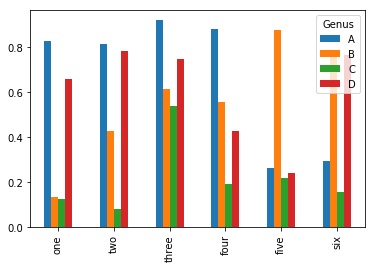

In [29]:
df.plot.bar()

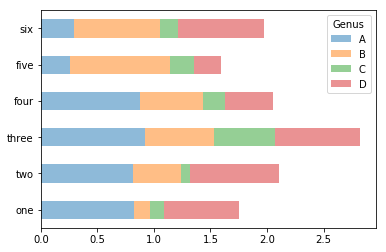

In [30]:
df.plot.barh(stacked=True, alpha=0.5)

#### Lets take an example to see how barplots work. we will analyse the tipping dataset.
#### We want to create a stacked bar chart showing the percentage of data points for each party size on each day.
#### We first load the data and make a cross-tabulation by day and party size. We remove the 1 and 6 person party as there are not much of it.

In [32]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [34]:
party_counts = party_counts.loc[:,2:5]

#### Next we normalize the data so that each row sums up to 1 and then make the plot.
#### We notice that the party size appears yto increase on the weekend.

In [36]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


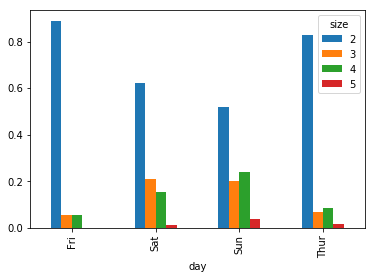

In [37]:
party_pcts.plot.bar()

#### For data that requires aggregation or summation before making a plot, using 'seaborn' can make things simpler.
#### seaborn plotting functions take a 'data' argument, which can be a pandas DataFrame. Other arguments refer to column names.
#### A seaborn barplot plots a bar having average value of a column. The balck line on the bars represent the 95% confidence interval. This interval can be configured through optional arguments.
#### The barplot also has a 'hue' option that enable us to split by an additional categorical value.

In [40]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


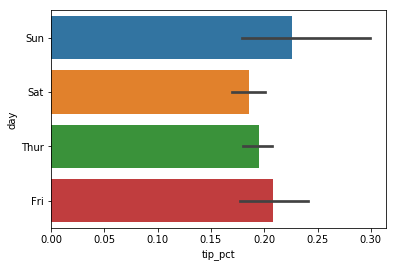

In [41]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

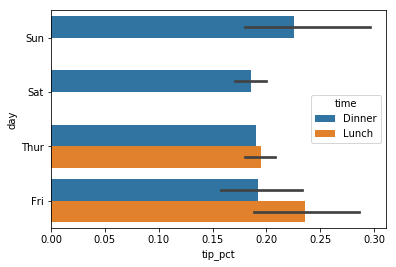

In [42]:
sns.barplot(x='tip_pct', y='day', hue = 'time', data=tips, orient='h')

#### seaborn automatically changes teh aesthetics of plots - default color palette, plot background and grid line colors.
#### We can switch between plot appearences using 'seaborn.set'.

In [44]:
sns.set(style="whitegrid")

### Histogram and Density plots
#### Histogram is a kind of bar plot that provides discretized display of value frequency.
#### The data points are split into discrete, evenly-spaced bins and the number of data points in each bin is plotted.
#### We can build a histogram using the 'plot.hist' method on a Series.

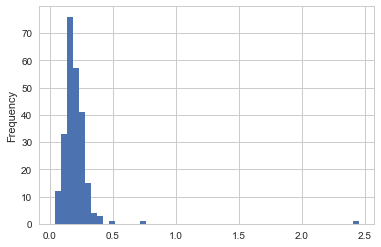

In [46]:
tips['tip_pct'].plot.hist(bins=50)

#### A similar plot is 'density' plot, formed by computing estimate of a comtinuos probability distribution that may have generated the observed data.
#### The usual procedure is to approximate this distribution as a mixture of 'kernels' i.e. simpler distributions like normal distribution. Hence they are also known as 'kernel density estimate (KDE)' plots.
#### We can use 'plot.kde' to make density plot using conventional mixture-of-normals estimate.

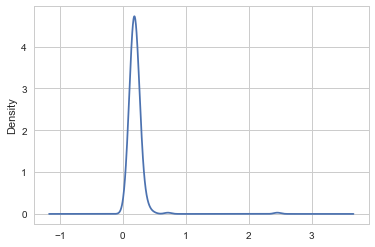

In [48]:
tips['tip_pct'].plot.density()

#### seaborn makes both the above plots even easier through its 'distplot' method.
#### It can plot histogram and continuous density estimate simultaneously.

C:\Users\adity\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


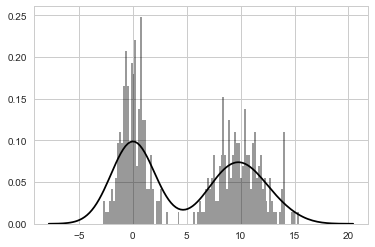

In [50]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point plots
#### It can be a usefule way of examining relationship between two 1-dimensional data series.
#### We can use seaborn's 'regplot' method to make a scatter plot an fit a linear regression line.

In [54]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 versus log unemp')

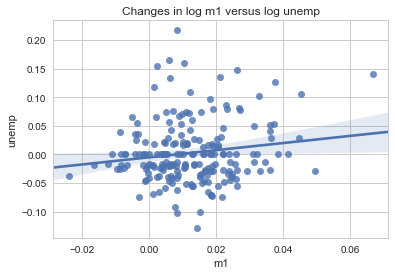

In [55]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

#### In Explorartory Data Analysis, its helpful to look at all the scatter plots amonng a group of variables. It is called 'pairs plot' or 'scatter plot matrix'.
#### To make the process of making this plot easier, seaborn has the 'pairplot' function, which provides histograms or density estimates of each variable along the diagonal.
#### The 'plot_kws' argument allows us to pass down configuration options to individual plotting calls on off-diagonal elements.

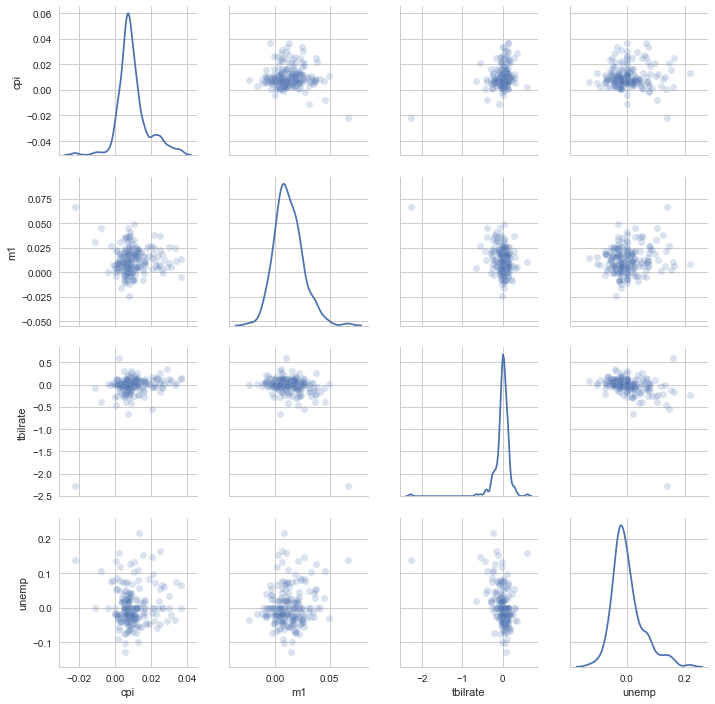

In [57]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data
#### To visualize data with many categorical variables means adding additional grouping dimensions to create a 'facet grid'. seaborn allows this with the function 'factorplot'.
#### Instead of grouping by a column, we also have the option of expanding the grid by adding one row of the column at a time. 
#### It also supports other plot types depending on what you are trying to display. eg - boxplots, showing median, quartiles, outliers.

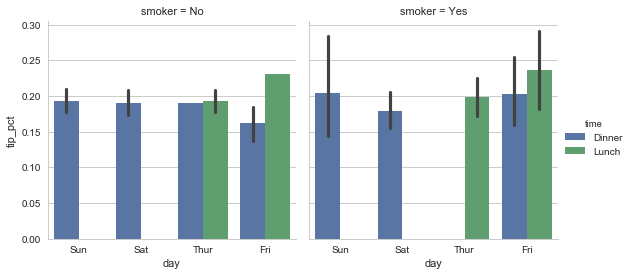

In [60]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind = 'bar', data=tips[tips.tip_pct < 1])

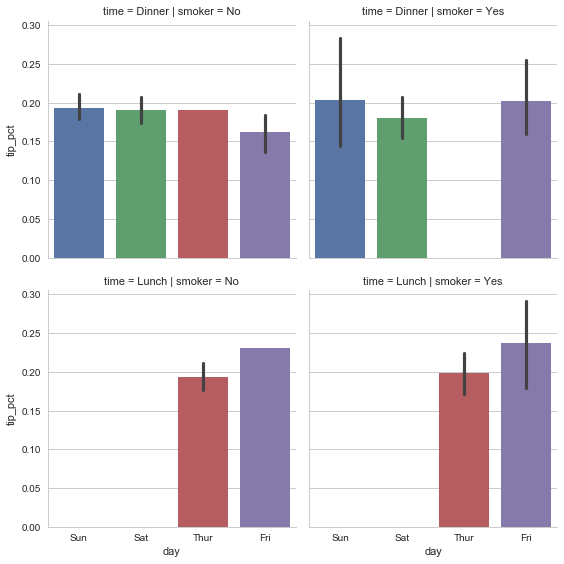

In [61]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
              kind = 'bar', data=tips[tips.tip_pct < 1])

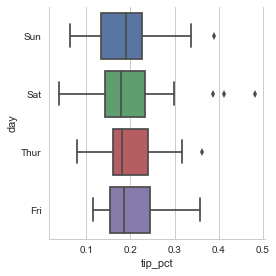

In [63]:
sns.factorplot(x='tip_pct', y='day', kind = 'box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualisation Tools
#### Like any other open-source software, Python has a plethora of options for graphic creation.
#### The focus has been to create interactive graphics for web publication.
#### With some tools, it is possible to specify dynamic, interactive graphics in Python for web browsers. eg - Bokeh, Plotly, etc.
#### For static graphs, its good idea defaulting to matplotlib with add-on libraries like seaborn and pandas.
#### For other data visualization needs, it will be good to learn one of the other avilable tools.